# Assignment 7 - Digital Recognizer NN

#### 1. Ingest
#### 2. 2 layer neural network
#### 3. 5 layer neural network
#### 4. Tensorboard
#### 5. Confusion Matrix from 5 layer neural network

Ingest

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard


In [42]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape
test.shape
train.head()

(42000, 785)

(28000, 784)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
y = train['label']
x = train.drop('label', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state=42)


#### 1. Neural Network with 2 layers: 397 nodes and 200 nodes for initial testing.

In [51]:

model = keras.Sequential([
    keras.layers.Dense(397, activation="relu"), #hidden layer1
    keras.layers.Dense(200, activation="relu"), #hidden layer2
    keras.layers.Dense(10, input_shape = (784,), activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

start=time.time()
model.fit(x_train, y_train, validation_data = (x_test, y_test), 
          batch_size = 8400, 
          epochs = 50)
end=time.time()
print("the running time for model fitting", end-start)

Epoch 1/50
4/4 [==============================] - 1s 159ms/step - loss: 68.0023 - accuracy: 0.2595 - val_loss: 16.4662 - val_accuracy: 0.6819
Epoch 2/50
4/4 [==============================] - 0s 106ms/step - loss: 14.1208 - accuracy: 0.7138 - val_loss: 9.4386 - val_accuracy: 0.7879
Epoch 3/50
4/4 [==============================] - 0s 104ms/step - loss: 7.9889 - accuracy: 0.8129 - val_loss: 6.7921 - val_accuracy: 0.8343
Epoch 4/50
4/4 [==============================] - 0s 103ms/step - loss: 6.1099 - accuracy: 0.8469 - val_loss: 4.7942 - val_accuracy: 0.8719
Epoch 5/50
4/4 [==============================] - 0s 99ms/step - loss: 4.4693 - accuracy: 0.8773 - val_loss: 3.7656 - val_accuracy: 0.8921
Epoch 6/50
4/4 [==============================] - 0s 99ms/step - loss: 3.2177 - accuracy: 0.9014 - val_loss: 3.2994 - val_accuracy: 0.8951
Epoch 7/50
4/4 [==============================] - 0s 106ms/step - loss: 2.8475 - accuracy: 0.9042 - val_loss: 2.6835 - val_accuracy: 0.9049
Epoch 8/50
4/4 [===

the running time for model fitting 20.721235990524292


In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (8400, 397)               311645    
_________________________________________________________________
dense_16 (Dense)             (8400, 200)               79600     
_________________________________________________________________
dense_17 (Dense)             (8400, 10)                2010      
Total params: 393,255
Trainable params: 393,255
Non-trainable params: 0
_________________________________________________________________


In [43]:
y_pred1 = model.predict(test)
y_pred1[4] ## make prediction over test data

array([9.4541298e-07, 1.4642775e-03, 8.5281765e-01, 9.9984241e-01,
       1.0842459e-06, 2.8697270e-01, 5.7007557e-26, 3.5755903e-01,
       8.1434190e-01, 3.8577038e-01], dtype=float32)

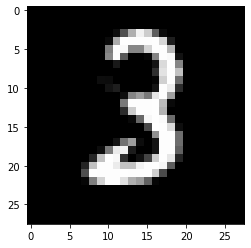

In [35]:
#visualize test data to see if prediction is correct
test1 = np.array(test, dtype = 'uint8')
test_rs = test1[4].reshape((28,28))
image = test_rs
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [36]:
np.argmax(y_pred1[4])

3

In [45]:
#save prediction to csv for submission

y_pred1 = np.argmax(y_pred1, axis =1)

y_pred11 = pd.Series(y_pred1, name="Label")

pred1 = pd.concat([pd.Series(range(1,28001), name="ImageId"), y_pred11], axis=1)
pred1.to_csv('pred1.csv', index=False)

## accuracy is 0.80585

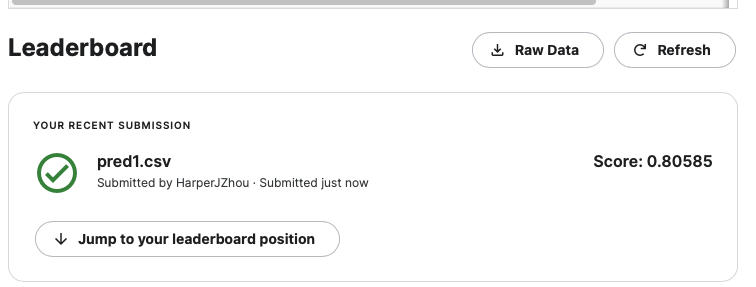

#### 2. Neural Network with 5 hidden layers with nodes 397, 397, 200, 200, 100

In [61]:
model = keras.Sequential([
    keras.layers.Dense(397, activation="relu"), #hidden layer1
    keras.layers.Dense(200, activation="relu"), #hidden layer2
    keras.layers.Dense(100, activation="relu"), #hidden layer3
    keras.layers.Dense(50, activation="relu"), #hidden layer4
    keras.layers.Dense(25, activation="relu"), #hidden layer5
    keras.layers.Dense(10, input_shape = (784,), activation = 'softmax')
])

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

start=time.time()
model.fit(x_train, y_train, validation_data = (x_test, y_test), 
          batch_size = 210, 
          epochs = 100,
         callbacks=[tensorboard_callback])
end=time.time()
print("the running time for model fitting", end-start)

Epoch 1/100
160/160 [==============================] - 2s 7ms/step - loss: 6.1066 - accuracy: 0.6260 - val_loss: 0.3564 - val_accuracy: 0.9024
Epoch 2/100
160/160 [==============================] - 1s 5ms/step - loss: 0.2766 - accuracy: 0.9229 - val_loss: 0.2656 - val_accuracy: 0.9262
Epoch 3/100
160/160 [==============================] - 1s 5ms/step - loss: 0.1700 - accuracy: 0.9490 - val_loss: 0.2259 - val_accuracy: 0.9365
Epoch 4/100
160/160 [==============================] - 1s 5ms/step - loss: 0.1098 - accuracy: 0.9666 - val_loss: 0.2099 - val_accuracy: 0.9432
Epoch 5/100
160/160 [==============================] - 1s 5ms/step - loss: 0.0758 - accuracy: 0.9760 - val_loss: 0.2254 - val_accuracy: 0.9433
Epoch 6/100
160/160 [==============================] - 1s 5ms/step - loss: 0.0630 - accuracy: 0.9799 - val_loss: 0.1942 - val_accuracy: 0.9527
Epoch 7/100
160/160 [==============================] - 1s 5ms/step - loss: 0.0509 - accuracy: 0.9847 - val_loss: 0.1924 - val_accuracy: 0.9507

Epoch 58/100
160/160 [==============================] - 1s 7ms/step - loss: 0.0147 - accuracy: 0.9960 - val_loss: 0.1617 - val_accuracy: 0.9742
Epoch 59/100
160/160 [==============================] - 1s 6ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.1750 - val_accuracy: 0.9757
Epoch 60/100
160/160 [==============================] - 1s 5ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.1793 - val_accuracy: 0.9721
Epoch 61/100
160/160 [==============================] - 1s 6ms/step - loss: 0.0229 - accuracy: 0.9947 - val_loss: 0.1709 - val_accuracy: 0.9680
Epoch 62/100
160/160 [==============================] - 1s 6ms/step - loss: 0.0165 - accuracy: 0.9951 - val_loss: 0.1750 - val_accuracy: 0.9710
Epoch 63/100
160/160 [==============================] - 1s 5ms/step - loss: 0.0093 - accuracy: 0.9973 - val_loss: 0.1811 - val_accuracy: 0.9720
Epoch 64/100
160/160 [==============================] - 1s 5ms/step - loss: 0.0108 - accuracy: 0.9973 - val_loss: 0.1539 - val_accuracy:

the running time for model fitting 79.87720108032227


In [55]:
y_pred2 = model.predict(test)

In [56]:
#save prediction to csv for submission

y_pred2 = np.argmax(y_pred2, axis =1)

y_pred21 = pd.Series(y_pred2, name="Label")

pred2 = pd.concat([pd.Series(range(1,28001), name="ImageId"), y_pred21], axis=1)
pred2.to_csv('pred2.csv', index=False)
## accuracy increase to 0.97546

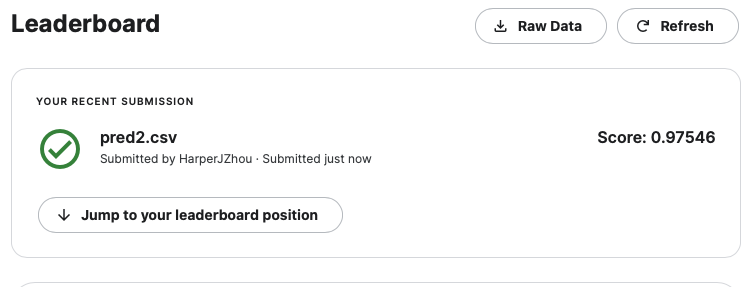

In [63]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 24335), started 0:06:32 ago. (Use '!kill 24335' to kill it.)

#### Confusion Matrix over validation set

In [68]:
test_y = np.argmax(model.predict(x_test), axis = -1)
test_y

array([8, 1, 9, ..., 3, 0, 9])

In [70]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, test_y)
confusion_matrix

array([[807,   0,   0,   0,   1,   2,   2,   1,   1,   2],
       [  0, 901,   1,   0,   1,   0,   1,   1,   4,   0],
       [  1,   3, 806,   6,   7,   1,   0,   4,  16,   2],
       [  0,   1,   1, 900,   0,  10,   0,   4,  16,   5],
       [  2,   0,   0,   0, 808,   0,   4,   2,   2,  21],
       [  0,   1,   1,  11,   1, 678,   2,   0,   4,   4],
       [  3,   1,   2,   1,   0,   3, 770,   0,   5,   0],
       [  1,   1,   7,   0,   1,   1,   0, 855,   2,  25],
       [  1,   1,   2,   2,   2,   5,   0,   1, 819,   2],
       [  0,   0,   1,   4,   2,   3,   0,   2,   2, 824]])